# Why Are Customers Churning

Project goals:
* Discover drivers of customers churning and other key insights.
* Use main drivers to develop machine learning models to predict churning customers.
* Identify feature importance using our best model's insights and compare to our EDA insights.

* Random state of 125 for reproducibility

## Imports

In [1]:
import acquire as a
import prepare as p
import explore as e
import model as m

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [3]:
from scipy import stats

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Acquire

Use pandas to read SQL query from our MySQL database, where our Telco data is stored.

In [5]:
# acquire telco data
telco_raw = a.get_telco_data()
# print data shape
print(f'Number of Rows: {telco_raw.shape[0]}\nNumber of Columns: {telco_raw.shape[1]}')
# preview
telco_raw.head(3)

Number of Rows: 7043
Number of Columns: 24


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


## Prepare

Data Transformations

1. Inspected raw data
    * Dropped foreign key columns
    * Checked for missing values (ecplicit and implicit)
       * found 11 `' '`'s in the `total_charges` column and imputed them with the median total charges
       * converted ` total_charges` column to a numeric data type
    * Checked for duplicate rows and customer id’s and saw none
    * Encoded categorical columns for modeling
    * Decoded categorical columns (except `churn`) for exploring

1. Inspect clean data
    * Ensured data was tidy:
        * one value per cell
        * each observation is one and only one row
        * each feature is one and only one column

1. Split the data
    * Saw class imbalance (73% to 27%) for the target, `churn`.
    * Performed 70/15/15 (train/validate/test) stratified split
    

Clean raw data

In [6]:
# clean the data for exploration
telco_explore = p.prep_telco_explore()
# print shape of data
print(f"Number of Customers: {telco_explore.shape[0]}\
        \nNumber of Columns: {telco_explore.shape[1]}")
# preview
telco_explore.head()

Number of Customers: 7043        
Number of Columns: 52


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,multiple_lines_no,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no,online_security_no_internet_service,online_security_yes,online_backup_no,online_backup_no_internet_service,online_backup_yes,device_protection_no,device_protection_no_internet_service,device_protection_yes,tech_support_no,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_month-to-month,contract_type_one_year,contract_type_two_year,internet_service_type_dsl,internet_service_type_fiber_optic,internet_service_type_none,payment_type_bank_transfer_(automatic),payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,Female,Non-Senior,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,0,One year,DSL,Mailed check,Yes,No,No,Yes,No,No,No,No,Yes,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,No,No,No,No,No,Yes
1,0003-MKNFE,Male,Non-Senior,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,0,Month-to-month,DSL,Mailed check,No,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes
2,0004-TLHLJ,Male,Non-Senior,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check,Yes,No,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,No,Yes,No
3,0011-IGKFF,Male,Senior,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check,Yes,No,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,No,Yes,No
4,0013-EXCHZ,Female,Senior,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,1,Month-to-month,Fiber optic,Mailed check,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes


In [7]:
# clean the data for modeling
telco_model = p.prep_telco_model()
# print shape of data
print(f"Number of Customers: {telco_model.shape[0]}\
        \nNumber of Columns: {telco_model.shape[1]}")
# preview
telco_model.head()

Number of Customers: 7043        
Number of Columns: 32


,customer_id,gender_male,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,0,0,1,1,9,1,1,65.6,593.30,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,1,0,0,0,9,1,0,59.9,542.40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,1,73.9,280.85,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,1,98.0,1237.85,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,1,83.9,267.40,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


Perform 70/15/15 train/validate/test split.

Determine if we should stratify on churn.

In [8]:
# view churn frequency
telco_explore['churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

Stratify on `churn` column since we have a 73/27 class imbalance.

In [9]:
# split the data
train, validate, test = p.split_data(telco_explore, stratify_col='churn', random_state=125)

Verify Split

In [10]:
# check set sizes
print(len(train), len(validate), len(test))
# check target proportions match original data (stratified)
train['churn'].value_counts(normalize=True)

4929 1057 1057


0    0.734632
1    0.265368
Name: churn, dtype: float64

## Explore

Explore data in search of features that drive churn 
   1. General Inspect
       - `.info()` and `.describe()`
       - identify continuous and categorical columns
   1. Univariate Stats: 
       - Categorical
       - Nunerical
   1. Bivariate Stats:
       - Categorical feature relationships with churn
       - Continuous feature relationships with churn
   1. Use these quick insights to ask and answer specific questions:
       - Which features appear to relate to churn the most?

Key Insights:
- Strong Drivers of Churn:
    - Shorter Tenure
    - Contract Type
    - Payment by Electronic Check
- Weak Drivers of Churn:
    - Gender

Load data. Explore only on the training data

In [11]:
# get train data to explore
telco, _, _ = p.split_data(p.prep_telco_explore(), stratify_col='churn', random_state=125)

### 2. Univariate Stats of Each Column

Categorical Columns:
- How many customers fit the category?
    - e.g. 50/50 male/female, 73/27 churn / no churn

GENDER


,gender,Count,Frequency
0,Male,2489,0.504971
1,Female,2440,0.495029


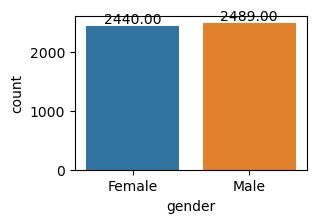


CHURN


,churn,Count,Frequency
0,0,3621,0.734632
1,1,1308,0.265368


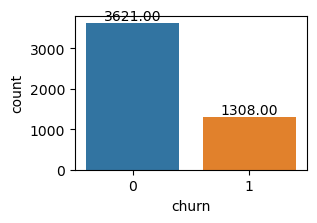

In [12]:
# explore univariate counts on gender and churn
e.explore_univariate_categorical_cols(telco, cat_cols=['gender','churn'])

Numeric Columns:
- What are the descriptive stats and distribution of the numeric data for our customers?
    - e.g. most frequent tenure lengths of 1, 2, and 72 months. Average and median tenure of about 30 months.

Descriptive Stats:



,tenure
count,4929.000000
mean,32.303307
std,24.530831
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


------------------------------------------------------------ 
 TENURE 

Most Frequent Values:
1     443
72    233
2     166
Name: tenure, dtype: int64


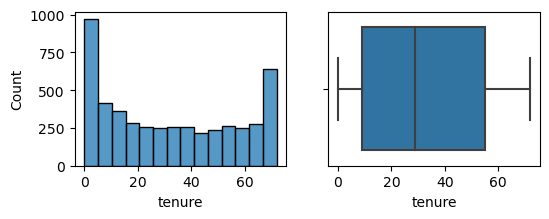

In [13]:
# explore univariate stats on tenure
e.explore_univariate_continuous_cols(telco, cont_cols=['tenure'])

### 3. Bivariate Stats of Each Column in Relation to Churn

Categorical Columns:
- How does each categorical column relate to churn?
    - e.g. churn rates by gender have little to no difference

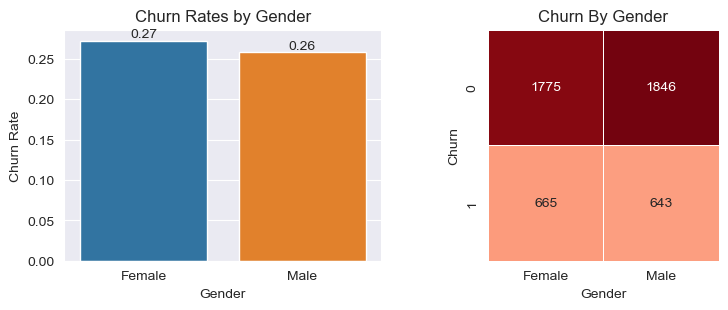

In [14]:
# plot gender to churn relationship charts
e.plot_bivariate_cat_to_cat_target_charts(telco, 'churn', 'gender')

Continuous Columns:
- For our numeric data, what are the averages and distributions of our churning customers and non-churning customers.
    - e.g. churner tenure is lower on average and is distributed differently than non-churner tenure.

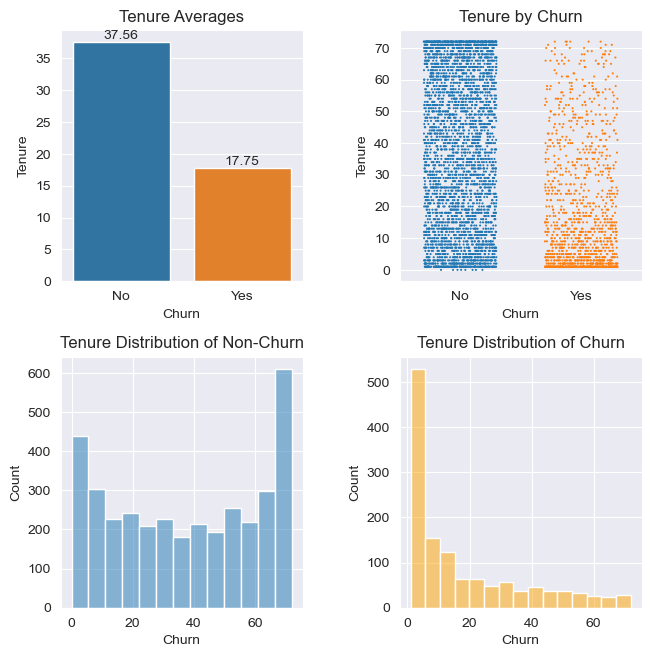

In [15]:
# plot tenure to churn relationship charts
e.plot_bivariate_cont_to_cat_target_charts(telco, 'churn', 'tenure')

### 4) Key Questions

With these quick insights, we can develop key questions:
- Q1: How does tenure relate to churn?
- Q2: How does internet service type relate to churn?
- Q3: Do those who pay by electronic check churn more than those who don't?
- Q4: How does contract type relate to churn?

### a) Q1: How does tenure relate to churn?

### b) Vizualization
Churners have less tenure, often in single digits.

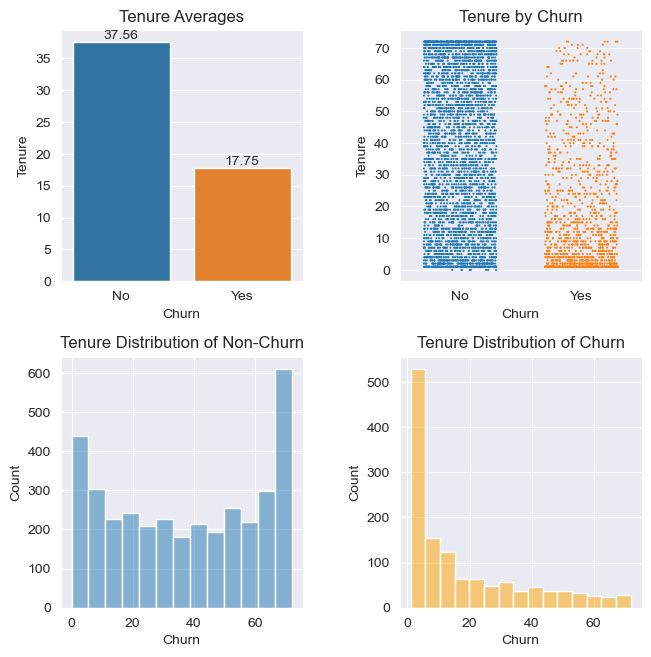

In [16]:
# plot tenure to churn relationship charts
e.plot_bivariate_cont_to_cat_target_charts(telco, 'churn', 'tenure')

### c) Statistical test
* Independent (Two-Sample) T-Test (2-sided)
* Hypotheses and significance level
    * $H_0$: There is no difference in average tenure for churners and non-churners.
    * $H_a$: There is a difference in average tenure for churners and non-churners.
    * $\alpha = .05$
* verify assumptions
    * Independence: Assumption met
    * Normality: Assumption met with large sample sizes
    * Equal Variances: Check with Levene's test
        * Variances are not equal, so we will set `equal_var=False` for the test


In [17]:
# Check equal variance in tenure
churner_data = telco[telco['churn']==1]
non_churner_data = telco[telco['churn']==0]
print(f"tenure variance for churners: {churner_data['tenure'].var()}")
print(f"tenure variance for non-churners: {non_churner_data['tenure'].var()}")
stat_levene, p_levene = stats.levene(churner_data['tenure'], non_churner_data['tenure'])
print(f'''A p value of {p_levene:.2e}, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal''')

tenure variance for churners: 379.2063880914059
tenure variance for non-churners: 578.1199407690954
A p value of 2.84e-62, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal


* Run test
* Interpret the results of the test

In [18]:
# run independent t-test
stat_ttest, p_ttest = stats.ttest_ind(churner_data['tenure'],
                                      non_churner_data['tenure'],
                                      equal_var=False)
print(f'''A p value of {p_ttest:.2e},\
 which is less than .05, indicates that churn is dependent on tenure''')

A p value of 1.86e-167, which is less than .05, indicates that churn is dependent on tenure


### d) Insight

With a low p value, we can conclude that **churn is dependent on tenure**.

---
### a) Q2: How does internet service type relate to churn?

### b) Vizualization
Churners primarilary have fiber-optic internet.

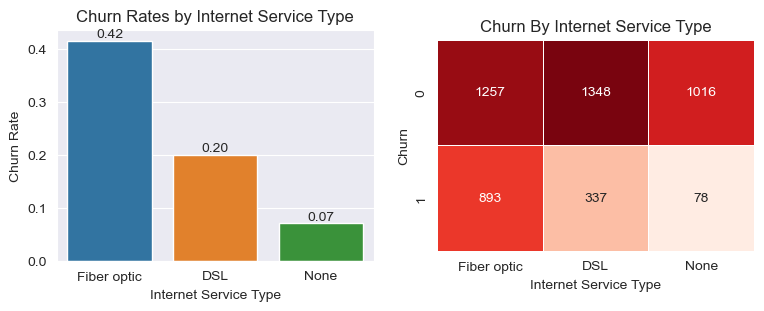

In [19]:
# plot internet service type to churn relationship charts
e.plot_bivariate_cat_to_cat_target_charts(telco, 'churn', 'internet_service_type')

### c) Statistical test
* state hypotheses and siginificance level
    * $H_0$: Churn is independent on Internet Service Type.
    * $H_a$: Churn is dependent on Internet Service Type.
    * $\alpha = .05$
* verify assumptions
    * Independence: Assumption met
    * Large sample sizes (`𝑛>5`)  for each cell in contigency table):  Assumption met
    * Randomly sampled observations: Assumption met
* Run test and interpret results

In [20]:
observed = pd.crosstab(telco['churn'],telco['internet_service_type'])
observed

internet_service_type,DSL,Fiber optic,None
churn,,,
0,1348,1257,1016
1,337,893,78


In [21]:
chi2, p_chi2, degf, expected = stats.chi2_contingency(observed)

The difference between our observed values and values expected if churn didnt depend on internet service type.

In [22]:
observed - expected

internet_service_type,DSL,Fiber optic,None
churn,,,
0,110.145466,-322.458308,212.312842
1,-110.145466,322.458308,-212.312842


In [23]:
print('Observed Values:\n', observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values:\n', expected)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'---\nchi^2 = {chi2:.4f}\np = {p_chi2:.2e}')

Observed Values:
 [[1348 1257 1016]
 [ 337  893   78]]
---
Expected Values:
 [[1237.85453439 1579.45830797  803.68715764]
 [ 447.14546561  570.54169203  290.31284236]]
---
chi^2 = 496.3690
p = 1.64e-108


### d) Insight:

By comparing the observed and expected contingency tables, we can see that the observed values are far from the values we'd expect to see if the data were independent. This, along with a very low p value and high $\chi^2$ statistic, allows us to conclude that **there is a significant, dependent relationship between churners and their internet service type**.

---
### a) Q3: Do those who pay by electronic check churn more than those who don't?

### b) Vizualization
More than half of our churning customers paid by electronic check.

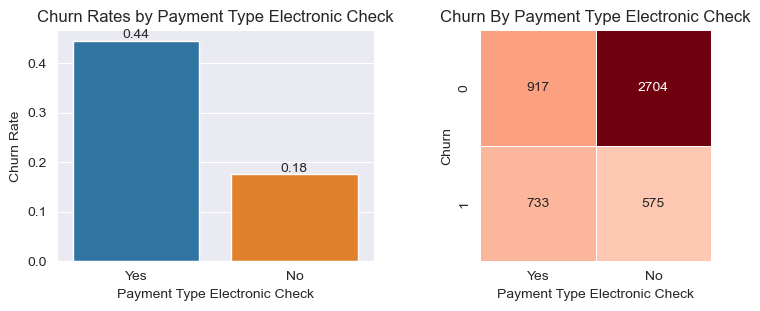

In [24]:
# plot electronic check payment type to churn relationship charts
e.plot_bivariate_cat_to_cat_target_charts(telco, 'churn', 'payment_type_electronic_check')

### d) Insight/Conclusion

Those that pay by electronic check churn at a rate of 44% compared to a churn rate of 18% for those that pay in other ways. We would expect a stats test to show dependence.

---
### a) Q4: How does contract type relate to churn?

### b) Vizualization
Churners are primarily on month-to-month contracts.

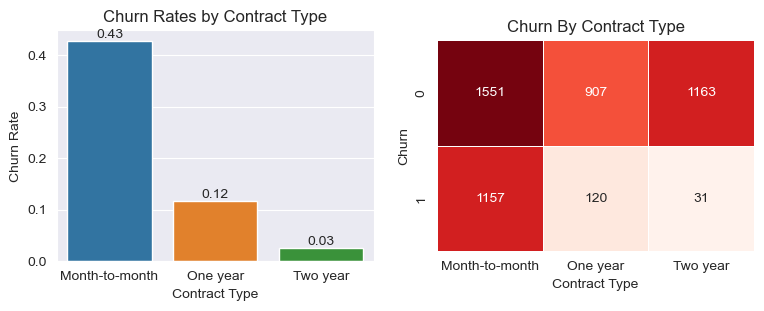

In [25]:
# plot contract type to churn relationship charts
e.plot_bivariate_cat_to_cat_target_charts(telco, 'churn', 'contract_type')

### d) Insight/Conclusion
Those on month to month contracts churn at a rate of 43% compared to a churn rate of 7% for those on other contracts. Those on two-year contracts rarely churn. We would expect a stats test to show dependence.

## Exploration Summary

Key Insights:
- Strong Drivers of Churn:
    - Tenure
    - Contract Type
    - Internet Service Type 
    - Payment by Electronic Check
- Weak Drivers of Churn:
    - Gender

---
## Modeling

* Develop a **model** to predict if a customer will churn
   1. Create and run a baseline model with `sklearn`'s `DummyClassifier` to compare our results to
   2. Use strong drivers to build predictive models of different types
   3. Create and run KNN, Logistic Regression, and Decistion Tree classification models
   4. Use the insights from the highest-performing model to confirm our initial hypotheses and insights on the features that are the biggest drivers of churn
        * Evaluate the model performances based on their **accuracy** scores.

Load the data

In [26]:
# load model data 
telco_model = p.prep_telco_model()
telco_model.head(3)

,customer_id,gender_male,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,0,0,1,1,9,1,1,65.6,593.30,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,1,0,0,0,9,1,0,59.9,542.40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,1,73.9,280.85,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


Perform 70/15/15 train/validate/test split.

Stratify on `churn` column since we have a 73/27 class imbalance.

In [27]:
# split data
train, validate, test = p.split_data(telco_model, stratify_col='churn', random_state=125)

### Baseline 
* create baseline model
    * baeline accuracy: 73% 

In [28]:
# run baseline model
baseline_scores = m.run_baseline_model(train, validate, 'churn')
baseline_scores

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
0,"[customer_id, gender_male, senior_citizen, par...",baseline,0.734632,0.0,0.0,0.0,0.734153,0.0,0.0,0.0


### Propose best models

In [29]:
strong_features = ['contract_type_one_year', 'contract_type_two_year',
                   'internet_service_type_none', 'internet_service_type_fiber_optic',
                   'payment_type_electronic_check', 'tenure']

In [ ]:
def run_lr_models(train, validate, target, feature_combinations, random_state=None):   
    '''
    takes in train set, validate set, target, columns to model
    gets all column combinations and runs knn models for each combination
    hyperparameter, k, is tuned by running each k in specified range, k_range
    scores for each model are stored in a DataFrame, scores_df
    
    Returns scores_df, a DataFrame of model scores
    '''

    # for each combo of features
    for i, features in enumerate(feature_combinations):
        # split X and y
        X_train, y_train = x_y_split(data_set=train, target=target, features=features)

        X_validate, y_validate = x_y_split(data_set=validate, target=target, features=features)
        
        scores = []
        
        # hyperparameter tuning
        for c in [1*10**x for x in range(-3, 4)]:
            # Make KNN classifier 
            clf = LogisticRegression(C=c, max_iter=150, random_state=125)

            # Fit KNN classifier
            clf.fit(X_train, y_train)

            # Predict
            y_pred_train = clf.predict(X_train)
            y_pred_val = clf.predict(X_validate)

            output = {
                'features':features,
                'model': f'LogReg: C={c}',
                'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
                'train_precision': metrics.precision_score(y_train, y_pred_train),
                'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
                'train_f1': metrics.f1_score(y_train, y_pred_train),
                'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
                'validate_precision': metrics.precision_score(y_validate, y_pred_val),
                'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
                'validate_f1': metrics.f1_score(y_validate, y_pred_val),
            }
            scores.append(output)
            
        # initialize scores DataFrame for first iteration
        if i == 0:
            scores_df = pd.DataFrame(scores)
        # concat scores DataFrames for the rest of the iterations
        else:
            scores_df = pd.concat([scores_df, pd.DataFrame(scores)])
            
    return scores_df

Run models and save scores

In [30]:
# get feature combinations to run on models
feature_combos = m.get_col_combos(strong_features)
# run KNN models
knn_scores = m.run_knn_models(train, validate, 'churn', feature_combos)
# run Logistic Regression models
lr_scores = m.run_lr_models(train, validate, 'churn', feature_combos)
# run Decision Tree models
dt_scores = m.run_dt_models(train, validate, 'churn', feature_combos)

In [31]:
# combine scores
scores = pd.concat([baseline_scores, knn_scores, lr_scores, dt_scores])

Find highest validation accuracies

In [32]:
# store 5 best models
best_models = scores.sort_values(by='validate_accuracy', ascending=False).head()
best_models

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
1,"[contract_type_one_year, contract_type_two_yea...",LogReg: C=0.01,0.795496,0.673210,0.445719,0.536339,0.805109,0.696335,0.473310,0.563559
1,"[internet_service_type_none, internet_service_...",LogReg: C=0.01,0.793670,0.670975,0.436544,0.528949,0.804163,0.698925,0.462633,0.556745
1,"[contract_type_two_year, internet_service_type...",LogReg: C=0.01,0.793670,0.670975,0.436544,0.528949,0.804163,0.698925,0.462633,0.556745
1,"[contract_type_one_year, internet_service_type...",LogReg: C=0.01,0.794076,0.672556,0.436544,0.529439,0.804163,0.698925,0.462633,0.556745
1,"[contract_type_one_year, contract_type_two_yea...",LogReg: C=0.01,0.788801,0.674967,0.393731,0.497344,0.803217,0.710983,0.437722,0.541850


View best model

In [33]:
row = best_models.iloc[0]
print(f'''features: {row['features']},\n
model: {row['model']},\n
accuracy: {round(row['validate_accuracy'], 3)}\n''')

features: ['contract_type_one_year', 'contract_type_two_year', 'internet_service_type_none', 'internet_service_type_fiber_optic', 'payment_type_electronic_check', 'tenure'],

model: LogReg: C=0.01,

accuracy: 0.805



### Perform best model on test data

Logistic Regression model:
- C = .01
- features:`'contract_type_one_year', 'contract_type_two_year', 'internet_service_type_none', 'internet_service_type_fiber_optic', 'payment_type_electronic_check', 'tenure'`

In [34]:
# run best model on test set
best_model = m.run_best_model(train, validate, strong_features)
best_model

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,test_accuracy,test_precision,test_recall/TPR,test_f1
0,"[contract_type_one_year, contract_type_two_yea...",LogReg: C=0.01,0.795496,0.67321,0.445719,0.536339,0.805109,0.696335,0.47331,0.563559


Find highest feature importances from best decision tree model

In [35]:
# determine decision tree model with the highest validation accuracy
best_dt_model = scores[scores['model'].str.startswith('DT')]\
                    .sort_values(by='validate_accuracy', ascending=False).head(1)
best_dt_model

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
4,"[contract_type_two_year, internet_service_type...","DT, max_depth=6, class_weight=None",0.798336,0.64537,0.532875,0.583752,0.801325,0.651064,0.544484,0.593023


View best Decision Tree model

In [36]:
print(f'''features: {best_dt_model.iloc[0]['features']},\n
model: {best_dt_model['model']},\n
accuracy: {round(best_dt_model['validate_accuracy'], 3)}\n''')

features: ['contract_type_two_year', 'internet_service_type_none', 'internet_service_type_fiber_optic', 'payment_type_electronic_check', 'tenure'],

model: 4    DT, max_depth=6, class_weight=None
Name: model, dtype: object,

accuracy: 4    0.801
Name: validate_accuracy, dtype: float64



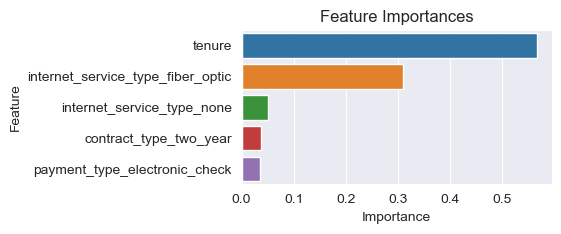

In [37]:
target='churn'
features = ['contract_type_two_year', 'internet_service_type_none', 
            'internet_service_type_fiber_optic',
            'payment_type_electronic_check', 'tenure']
max_depth = 8

# plot sorted feature importances determined by best DT model
m.plot_DT_feature_importances(train, validate, target, features, max_depth)

### Modeling Wrap

* Our best model, a logistic regression classifier running on all 6 of our driving features, had an 80.5% accuracy score, up from our baseline accuracy of 73%.

* Our best decision tree model (80.1% accuracy) displayed our features by order of importance (in prediciting churn):
    * tenure
    * having fiber optic internet
    * having no internet service
    * having a two year contract
    * paying by electronic check

## Conclusion

### Summary
Key Insights:
- Strong Drivers of Churn:
    - Tenure
        - Churners have a shorter tenure
    - Internet Service Type
        - Churners largely have fiber optic internet
    - Contract Type
        - Churners are largely on month-to-month contracts
        - Churners are rarely on twy-year contracts
    - Payment by Electronic Check
        - Churners typically pay by electronic check
        
We were able to outperform our baseline accuracy of 73% by fitting a logistic regression classifier and getting an 80.5% accuracy.


### Recommendations
* With most churning customers leaving in the first few months, we should take action early to prevent churn.
    * We can take low-cost actions like reaching out and offering a survey of customer satisfaction.
    * We can consider higher-investment actions like offering promotions or early discounts
* Take similar action to encourage customers to go on a one or two year contract rather than month-to-month.
* We should see why those with fiber-optic cable churn more than others.
    * Is this cost related? (look into monthly charges) 
    * How does out fiber-optic cable perform?

### Next Steps
With more time, we can:
- Do Multivariate analysis and see how a combination or columns relate to churn 
- Develop a better-performing model by feature engineering, feature scaling, running other ML classifiers, etc.
- If we want to take action with any of the recommendations, we can change our performance metric to precision or recall, and predict and target customers this way.